# Lab 8 Tasks

# Task 1 - Iris.csv


In [1]:
import pandas as pd

df = pd.read_csv("iris.csv")
print(df.shape)
print(df.head(5))

(150, 5)
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


**Preprocessing of the iris data**

In [2]:
print(df.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object


**Check for duplicates**

In [3]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (3, 5)


**Drop the duplicates**

In [4]:
df = df.drop_duplicates()
df.count()

sepal length    147
sepal width     147
petal length    147
petal width     147
class           147
dtype: int64

**Count the number of nulls in each column**

In [5]:
print(df.isnull().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


**Print a summary statistics on the attributes**

In [6]:
print(df.describe())

       sepal length  sepal width  petal length  petal width
count    147.000000   147.000000    147.000000   147.000000
mean       5.856463     3.055782      3.780272     1.208844
std        0.829100     0.437009      1.759111     0.757874
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.400000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


**Plot histograms of numeric variables**

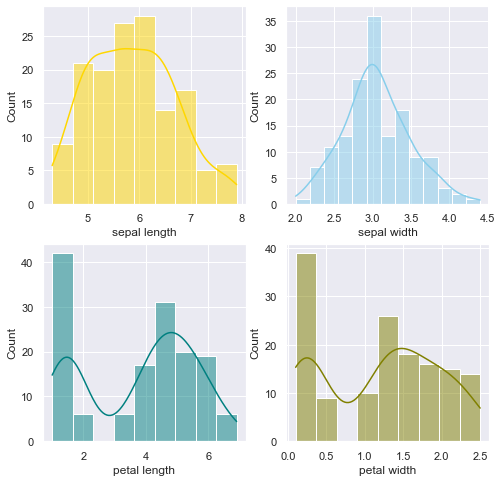

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

fig, axs=plt.subplots(2,2, figsize=(8,8))

#plot the histograms
sns.histplot(data=df, x="sepal length", kde=True, color="gold", ax=axs[0,0])
sns.histplot(data=df, x="sepal width", kde=True, color="skyblue", ax=axs[0,1])
sns.histplot(data=df, x="petal length", kde=True, color="teal", ax=axs[1,0])
sns.histplot(data=df, x="petal width", kde=True, color="olive", ax=axs[1,1])

plt.show()

**4 - Specify the input variables and the target variable**

In [10]:
X = df.drop(['class'], axis=1)
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y = df['class'].values
print(Y[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


**Split the dataset into two pieces: training set and testing set, using the    
‘train_test_split’ function from sklearn. The testing data will be used to check the    
accuracy of the kNN model.**

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_Vali_test, Y_train, y_Vali_test = train_test_split(X, Y,
                                    test_size=0.2, random_state=1, stratify=Y)

In [14]:
print(X_train.shape)

(117, 4)


**Because the “test_size” in ‘train_test_split’ is set as 0.2, which means 20% of the    
data is used as testing data, and the other 80% is training data. There are 147 rows    
in the iris dataset, so you should see the size of the input training set as: (117,4)**

_______________________________________________________

**Build the kNN classifier    
We will create a new k-NN classifier and set ‘n_neighbors’ as ‘3’, which means a    
new data point is labelled with by majority from the 3 nearest points.    
Next we will use the ‘fit’ function and pass in our training data as parameters to fit the    
kNN model to the training data.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

**Testing the model    
Once the model is trained, we can use the ‘predict’ function on our model to make    
predictions on our testing data. To save space, we will only show the first 5    
predictions of our testing set.**    

In [35]:
print(knn.predict(X_Vali_test)[0:5])

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


**Now let’s see how accurate our model is on the full testing set. To do this, we will use    
the ‘score’ function and pass in the testing input and target data to see how well our    
model predictions match up to the actual results**

In [39]:
print('Accuracy :', knn.score(X_Vali_test, y_Vali_test))

Accuracy : 0.9666666666666667


**Tune the model    
In general, the accuracy rises as the model complexity increases. For kNN the model    
complexity is determined by the value of K. Larger K value leads to smoother    
decision boundary (less complex model). Smaller K leads to more complex model    
(may lead to overfitting). Accuracy penalizes models that are too complex (over    
fitting) or not complex enough (underfit).**
    
**Change the value of K, i.e., the value of ‘n_neighbours’ in step 5, for example, set k    
as 2, 10, 20, etc. Check how the accuracy changes accordingly.    
You can also change the distance metric and observe how this will affect the    
accuracy.**

# Task 2 - Diabetes



A decision tree is a flowchart-like tree structure. The topmost node in a decision tree is known as the root node.    
It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner. This flowchart-like structure helps you in decision making. It's    
visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.    
Decision Tree is a white box type of ML algorithm. It shares internal decision-making logic, which is not available in the black box type of algorithms such as Neural Network.    
The decision tree is a distribution-free or non-parametric method, which does not depend upon probability distribution assumptions.    

**Import the libraries we'll need**

In [40]:
import numpy as np
import pandas as pd
#import the decision tree
from sklearn.tree import DecisionTreeClassifier
#import the train test split function
from sklearn.model_selection import train_test_split
#import the metrics model for accuracy calcs
from sklearn import metrics

#load the diabetes file and show the output
df2 = pd.read_csv("diabetes_with_head.csv")
print(df2.shape)
df2.head()

(768, 9)


,pregnant,glucose,bp,skin,insulin,BMI,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Check the types of data - pre processing**

In [41]:
print(df2.dtypes)

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
BMI         float64
pedigree    float64
age           int64
label         int64
dtype: object


**Check duplicate rows**

In [42]:
dRows = df2[df2.duplicated()]
print("Number of duplicate rows: ", dRows.shape)

Number of duplicate rows:  (0, 9)


**Print a summary**

In [44]:
print(df2.describe())

         pregnant     glucose          bp        skin     insulin         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age       label  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

**Display first 10 rows**

In [45]:
print(df2.head(10))

   pregnant  glucose  bp  skin  insulin   BMI  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1
5         5      116  74     0        0  25.6     0.201   30      0
6         3       78  50    32       88  31.0     0.248   26      1
7        10      115   0     0        0  35.3     0.134   29      0
8         2      197  70    45      543  30.5     0.158   53      1
9         8      125  96     0        0   0.0     0.232   54      1


**Check for null values**

In [47]:
print(df2.isnull().sum())

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
BMI         0
pedigree    0
age         0
label       0
dtype: int64


**'0' values do not work for this model, thus need to be changed to 'NaN' for removal, or modified to the mean values instead    
Therefore, we need to check for '0' values, and act accordingly. (in this case, they will be imputed with the mean value).**

In [51]:
#count the number of missing values of those columns
print((df2[["glucose", "bp", "skin", "insulin", "BMI"]] == 0).sum())

# mark the zero values with NaN
df2[["glucose", "bp", "skin", "insulin", "BMI"]] = df2[["glucose", "bp", "skin", "insulin", "BMI"]].replace(0, np.NaN)

#check the number of NaN's in each column
print(df2.isnull().sum())
#print the first 10 rows
print(df2.head(10))

#fill the missing values with the mean
df2.fillna(df2.mean(), inplace=True)
#check if there are still any NaN's
print(df2.isnull().sum())
#check the imputated datas of the first 10 rows
print(df2.head(10))

glucose    0
bp         0
skin       0
insulin    0
BMI        0
dtype: int64
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
BMI         0
pedigree    0
age         0
label       0
dtype: int64
   pregnant  glucose         bp      skin     insulin        BMI  pedigree  \
0         6    148.0  72.000000  35.00000  155.548223  33.600000     0.627   
1         1     85.0  66.000000  29.00000  155.548223  26.600000     0.351   
2         8    183.0  64.000000  29.15342  155.548223  23.300000     0.672   
3         1     89.0  66.000000  23.00000   94.000000  28.100000     0.167   
4         0    137.0  40.000000  35.00000  168.000000  43.100000     2.288   
5         5    116.0  74.000000  29.15342  155.548223  25.600000     0.201   
6         3     78.0  50.000000  32.00000   88.000000  31.000000     0.248   
7        10    115.0  72.405184  29.15342  155.548223  35.300000     0.134   
8         2    197.0  70.000000  45.00000  543.000000  30.500000     0.158   
9  

**Find the correlation between the variables using a headmap**

          pregnant   glucose        bp      skin   insulin       BMI  \
pregnant  1.000000  0.127911  0.208522  0.082989  0.056027  0.021565   
glucose   0.127911  1.000000  0.218367  0.192991  0.420157  0.230941   
bp        0.208522  0.218367  1.000000  0.192816  0.072517  0.281268   
skin      0.082989  0.192991  0.192816  1.000000  0.158139  0.542398   
insulin   0.056027  0.420157  0.072517  0.158139  1.000000  0.166586   
BMI       0.021565  0.230941  0.281268  0.542398  0.166586  1.000000   
pedigree -0.033523  0.137060 -0.002763  0.100966  0.098634  0.153400   
age       0.544341  0.266534  0.324595  0.127872  0.136734  0.025519   
label     0.221898  0.492928  0.166074  0.215299  0.214411  0.311924   

          pedigree       age     label  
pregnant -0.033523  0.544341  0.221898  
glucose   0.137060  0.266534  0.492928  
bp       -0.002763  0.324595  0.166074  
skin      0.100966  0.127872  0.215299  
insulin   0.098634  0.136734  0.214411  
BMI       0.153400  0.025519  0.3

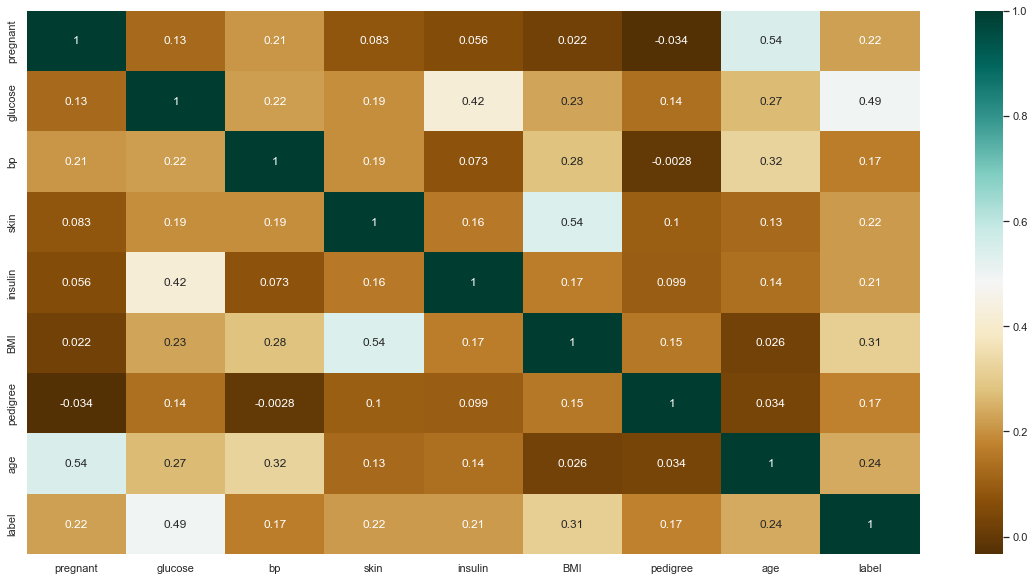

In [53]:
plt.figure(figsize=(20,10))
corl= df2.corr()
sns.heatmap(corl, cmap="BrBG", annot=True)
print(corl)

The maximum correlation coefficient in this matrix is 0.54, which means variables in    
this data are not significantly correlated, so no further processes.

**5. Specify the input variables and the target variable.    
We will use the first eight columns as input variable and the last column, i.e., label, as    
target variable to build a Decision Tree.**

In [54]:
X = df2.drop(['label'], axis=1)
X.head()

,pregnant,glucose,bp,skin,insulin,BMI,pedigree,age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [56]:
#separate the target variable
y = df2.label
print(y[0:5])

0    1
1    0
2    1
3    0
4    1
Name: label, dtype: int64


**Split the dataset into two pieces: 70% for training, and 30% for testing.**

In [77]:
X_train, x_Vali_test, y_train, y_Vali_test = train_test_split(X, y,
                                                test_size=0.3, random_state=1)

print("X Train: ", X_train.shape)

X Train:  (537, 8)


**Construct a decision tree**

In [78]:
#Create the decision tree classifier object
clf = DecisionTreeClassifier()
#Train the decision tree classifier
clf = clf.fit(X_train, y_train)

**Test the accuracy of the model with a prediction**

In [80]:
#predict the response for test dataset
y_pred = clf.predict(x_Vali_test)
#model accuracy
print("Accuracy: ",metrics.accuracy_score(y_Vali_test, y_pred))

Accuracy:  0.7359307359307359


**Visualise the Decision Tree**

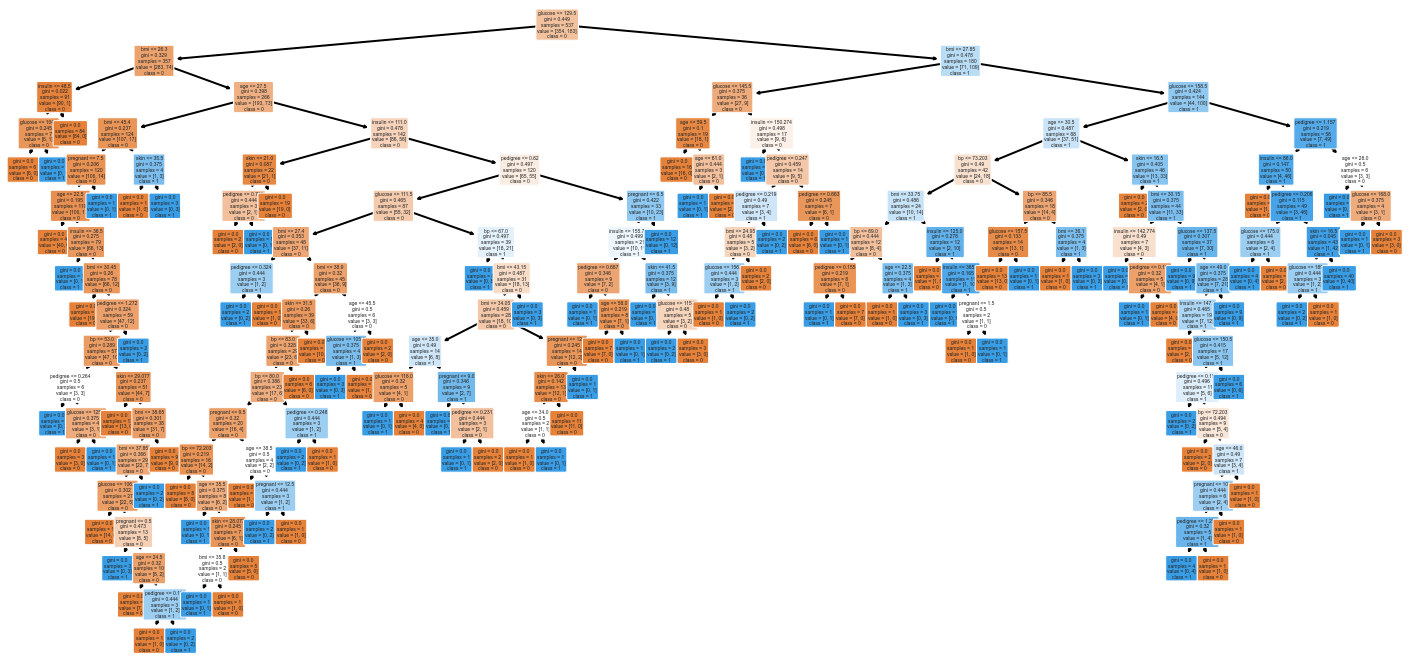

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

feature_cols = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age']

plt.figure(figsize=(25,12))
a = plot_tree(clf,
                feature_names=feature_cols,
                class_names=['0','1'],
                filled=True,
                rounded=True,
                fontsize=5
)
for o in a:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

**Tune the decision tree model** (for the 30%)

Let us limit the max-depth of the tree as 3 and use chaos as the criterion to measure the quality of a split

In [84]:
#Create a decision tree classifier object
clf_02 = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#train the classifier
clf_02 = clf_02.fit(X_train, y_train)
#preddict the response of the test dataset
y_pred = clf_02.predict(x_Vali_test)
#model accuracy
print("Accuracy: ", metrics.accuracy_score(y_Vali_test, y_pred))

Accuracy:  0.7662337662337663


**Visualise the tree**

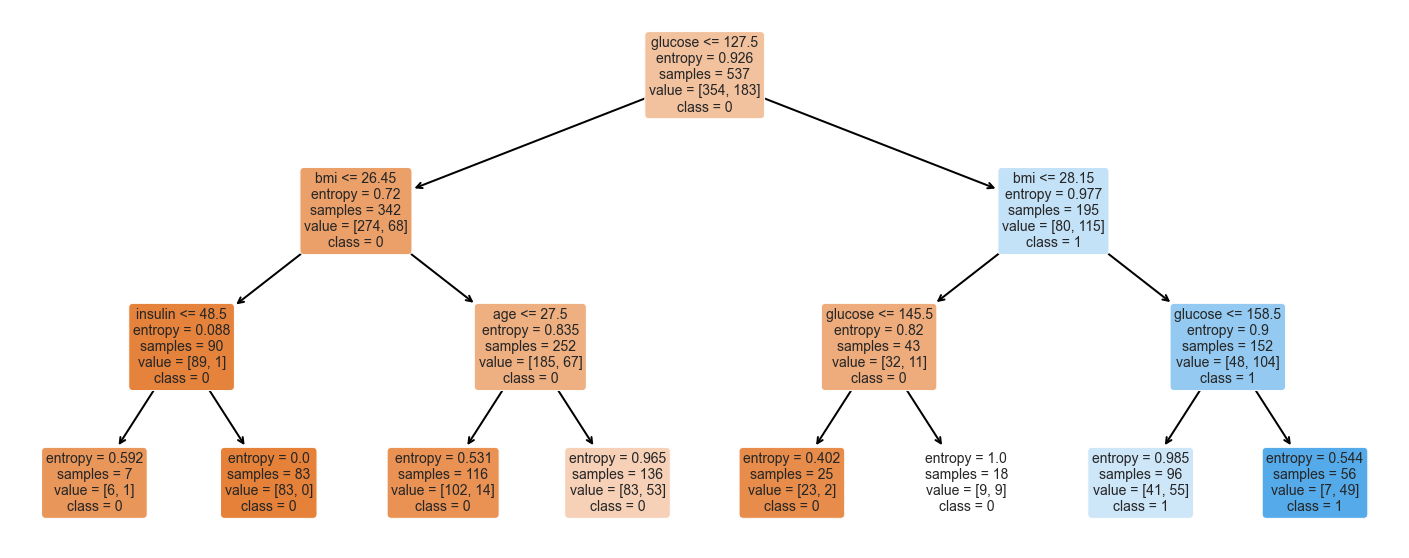

In [85]:
plt.figure(figsize=(25,10))
a = plot_tree(clf_02,
                feature_names=feature_cols,
                class_names=['0','1'],
                filled=True,
                rounded=True,
                fontsize=14
)
for o in a:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(2)

# Task 3 - Insurance.csv
